# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [4]:
train_df = pd.read_csv(r"C:\Users\Kiran\OneDrive\Desktop\AIML\Emotion-Predictor-From-Social-Media-Usge\train.csv", on_bad_lines='skip')
test_df = pd.read_csv(r"C:\Users\Kiran\OneDrive\Desktop\AIML\Emotion-Predictor-From-Social-Media-Usge\test.csv", on_bad_lines='skip')

In [5]:
# viwing the traing data, test data and validation data
print("Training Data:")
display(train_df.head())
print("----------------------------------------------------------------------")
print("Testing Data:")
display(test_df.head())

Training Data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


----------------------------------------------------------------------
Testing Data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500.0,27,Female,Snapchat,120.0,4.0,40.0,18.0,22.0,Neutral
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,488.0,21,Non-binary,Snapchat,60.0,1.0,18.0,7.0,12.0,Neutral
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# training data info
print("Traing Data Info:")
train_df.info()

Traing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


In [7]:
# testing data info
print("Testing Data Info:")
test_df.info()

Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     103 non-null    float64
 1   Age                         103 non-null    object 
 2   Gender                      103 non-null    object 
 3   Platform                    103 non-null    object 
 4   Daily_Usage_Time (minutes)  103 non-null    float64
 5   Posts_Per_Day               103 non-null    float64
 6   Likes_Received_Per_Day      103 non-null    float64
 7   Comments_Received_Per_Day   103 non-null    float64
 8   Messages_Sent_Per_Day       103 non-null    float64
 9   Dominant_Emotion            103 non-null    object 
dtypes: float64(6), object(4)
memory usage: 16.2+ KB


* Shape of the training, testing, and validation data.

In [8]:
print(f"There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in the training data.")
print(f"There are {test_df.shape[0]} rows and {test_df.shape[1]} columns in the testing data.")

There are 1001 rows and 10 columns in the training data.
There are 206 rows and 10 columns in the testing data.


In [9]:
# checking for null values
print("Training Data:")
display(train_df.isnull().sum())
print("----------------------------------------------------------------------")
print("Testing Data:")
display(test_df.isnull().sum())

Training Data:


User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

----------------------------------------------------------------------
Testing Data:


User_ID                       103
Age                           103
Gender                        103
Platform                      103
Daily_Usage_Time (minutes)    103
Posts_Per_Day                 103
Likes_Received_Per_Day        103
Comments_Received_Per_Day     103
Messages_Sent_Per_Day         103
Dominant_Emotion              103
dtype: int64

In [10]:
train_df.duplicated().sum()
print(f'The number of duplicates rows in the train dataset are: ', train_df.duplicated().sum())

The number of duplicates rows in the train dataset are:  0


In [11]:
test_df.duplicated().sum()
print(f'The number of duplicates rows in the test dataset are: ', test_df.duplicated().sum())
# Drop these duplicates 
test_df.drop_duplicates(inplace=True)
# Lets check again
test_df.duplicated().sum()
print(f'The number of duplicates rows in the test dataset after deleting duplicates are: ', test_df.duplicated().sum())

The number of duplicates rows in the test dataset are:  106
The number of duplicates rows in the test dataset after deleting duplicates are:  0


# Exploratory Data Analysis (EDA)

In [12]:
train_df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


### Describe the training data

In [13]:
train_df.describe()

,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,95.950000,3.321000,39.898000,15.611000,22.560000
std,38.850442,1.914582,26.393867,8.819493,8.516274
min,40.000000,1.000000,5.000000,2.000000,8.000000
25%,65.000000,2.000000,20.000000,8.000000,17.750000
50%,85.000000,3.000000,33.000000,14.000000,22.000000
75%,120.000000,4.000000,55.000000,22.000000,28.000000
max,200.000000,8.000000,110.000000,40.000000,50.000000


### Age Distribution

In [14]:
train_df['Age'].isnull().sum()

0

In [15]:
train_df['Age'].unique()

array(['25', '30', '22', '28', '33', '21', '27', '24', '29', '31', '23',
       '26', '34', '35', '32', 'Male', 'Female', 'Non-binary',
       ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:'],
      dtype=object)

* In the age coloum we have 4 irrigular values.
  * Male, Female, Non-binary, and other.


In [16]:
# removing the Male, Female, Non-binary, and işte mevcut veri kümesini 1000 satıra tamamlıyorum:

# Replace non-numeric values with NaN
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Age'] = train_df['Age'].astype('int64')

test_df['Age'] = pd.to_numeric(test_df['Age'], errors='coerce')
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Age'] = test_df['Age'].astype('int64')

In [17]:
train_df['Age'].unique()

array([25, 30, 22, 28, 33, 21, 27, 24, 29, 31, 23, 26, 34, 35, 32],
      dtype=int64)

In [18]:
age_counts = train_df['Age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Count']  
age_counts = age_counts.sort_values('Age')
plt = px.line(
    age_counts,
    x='Age',
    y='Count',
    title='Age Distribution (Line Plot)',
    markers=True, 
    color_discrete_sequence=['blue']
)
plt.show()



1. **Age Distribution**: The majority of the users are between the ages of 21 and 35. The highest count is in the age group of 27.
    - Age 27: 169 users
    - Age 28: 92 users
    - Age 29: 90 users

### Gender Distribution

In [19]:
train_df['Gender'].unique()

array(['Female', 'Male', 'Non-binary', '27', '24', '29', '33', '31', '22',
       '25', '28', '30', '23', '34', '26', '35', '21', '32', nan],
      dtype=object)

In [20]:
# Function to replace numeric values with NaN
def clean_gender_column(gender_value):
    try:
        # Try converting the value to float, if it succeeds it's a numeric value
        float(gender_value)
        return np.nan
    except ValueError:
        # If conversion fails, it's a valid gender entry
        return gender_value

# Apply the function to the Gender column
train_df['Gender'] = train_df['Gender'].apply(clean_gender_column)
train_df['Gender'].fillna('Unknown', inplace=True)
print(train_df['Gender'].unique())

test_df['Gender'] = test_df['Gender'].apply(clean_gender_column)
test_df['Gender'].fillna('Unknown', inplace=True)
print(test_df['Gender'].unique())


['Female' 'Male' 'Non-binary' 'Unknown']
['Unknown' 'Female' 'Non-binary' 'Male']


In [21]:
train_df['Gender'].unique()

array(['Female', 'Male', 'Non-binary', 'Unknown'], dtype=object)

In [22]:
train_df['Gender'].value_counts()

Gender
Female        344
Male          332
Non-binary    248
Unknown        77
Name: count, dtype: int64

In [23]:
plt = px.histogram(train_df, x='Gender', title='Gender Distribution')
plt.show()

1. **Gender Distribution**: The majority of the users are Female, followed by Male and Non-Binary.
    - Female: The highest count of users.
    - Male: The second highest count of users.
    - Non-Binary: The least count of users.

2. **Unknown Gender**: There is a small portion of users with an unknown gender, which might indicate missing or unrecorded data.

3. **Balanced Distribution**: The distribution between Male and Female users is relatively balanced, which can be useful for gender-based analysis.

4. **Non-Binary Representation**: The presence of Non-Binary users highlights the inclusivity of the dataset, allowing for more comprehensive gender-based insights.

These insights can help in understanding the demographic distribution of the users and can be used for further gender-based analysis in the dataset.
```

### Platform Distribution

In [24]:
train_df['Platform'].unique()

array(['Instagram', 'Twitter', 'Facebook', 'LinkedIn', 'Whatsapp',
       'Telegram', 'Snapchat', nan], dtype=object)

In [25]:
train_df['Platform'].value_counts()

Platform
Instagram    250
Twitter      200
Facebook     190
LinkedIn     120
Whatsapp      80
Telegram      80
Snapchat      80
Name: count, dtype: int64

In [26]:
# filling with mode
train_df['Platform'].fillna(train_df['Platform'].mode()[0], inplace=True)

In [27]:
test_df

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,27,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500.0,27,Female,Snapchat,120.0,4.0,40.0,18.0,22.0,Neutral
3,488.0,21,Non-binary,Snapchat,60.0,1.0,18.0,7.0,12.0,Neutral
5,776.0,28,Non-binary,Snapchat,115.0,3.0,38.0,18.0,27.0,Anxiety
7,869.0,27,Male,Telegram,105.0,3.0,48.0,20.0,28.0,Anxiety
...,...,...,...,...,...,...,...,...,...,...
195,418.0,27,Male,Twitter,90.0,3.0,40.0,16.0,24.0,Sadness
197,184.0,22,Male,Twitter,70.0,1.0,20.0,5.0,22.0,Neutral
199,896.0,33,Male,LinkedIn,85.0,4.0,35.0,18.0,18.0,Boredom
201,708.0,24,Non-binary,Facebook,110.0,6.0,35.0,23.0,25.0,Sadness


In [28]:
train_df['Platform'].unique()

array(['Instagram', 'Twitter', 'Facebook', 'LinkedIn', 'Whatsapp',
       'Telegram', 'Snapchat'], dtype=object)

In [29]:
train_df['Platform'].value_counts()

Platform
Instagram    251
Twitter      200
Facebook     190
LinkedIn     120
Whatsapp      80
Telegram      80
Snapchat      80
Name: count, dtype: int64

In [30]:
plt = px.histogram(train_df, x='Platform', title='Platform Distribution')
plt.show()

**Instagram** has the highest user count, demonstrating strong popularity.

**Twitter** and **Facebook** follow with substantial user engagement.

**LinkedIn**, **WhatsApp**, **Telegram**, and **Snapchat** have lower but notable user bases.

### Daily Usage Time (minutes) Distribution

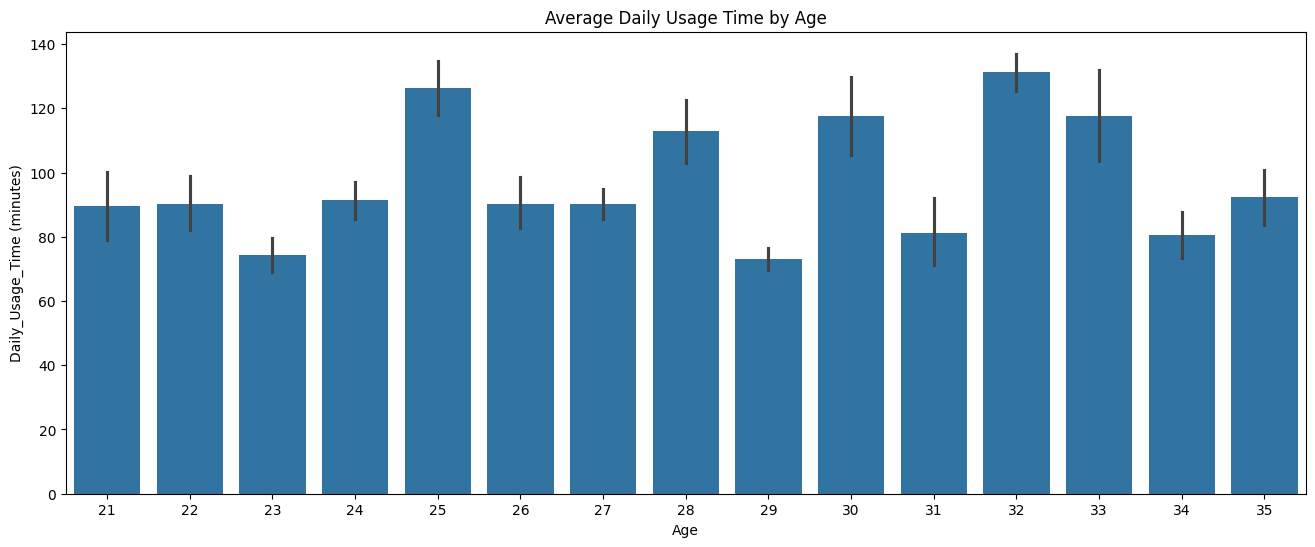

In [31]:
import matplotlib.pyplot as plt
# Create the bar plot for average daily usage time by age
plt.figure(figsize=(16, 6))  # Set the figure size
sns.barplot(x='Age', y='Daily_Usage_Time (minutes)', data=train_df)

# Add title and show the plot
plt.title('Average Daily Usage Time by Age')
plt.show()


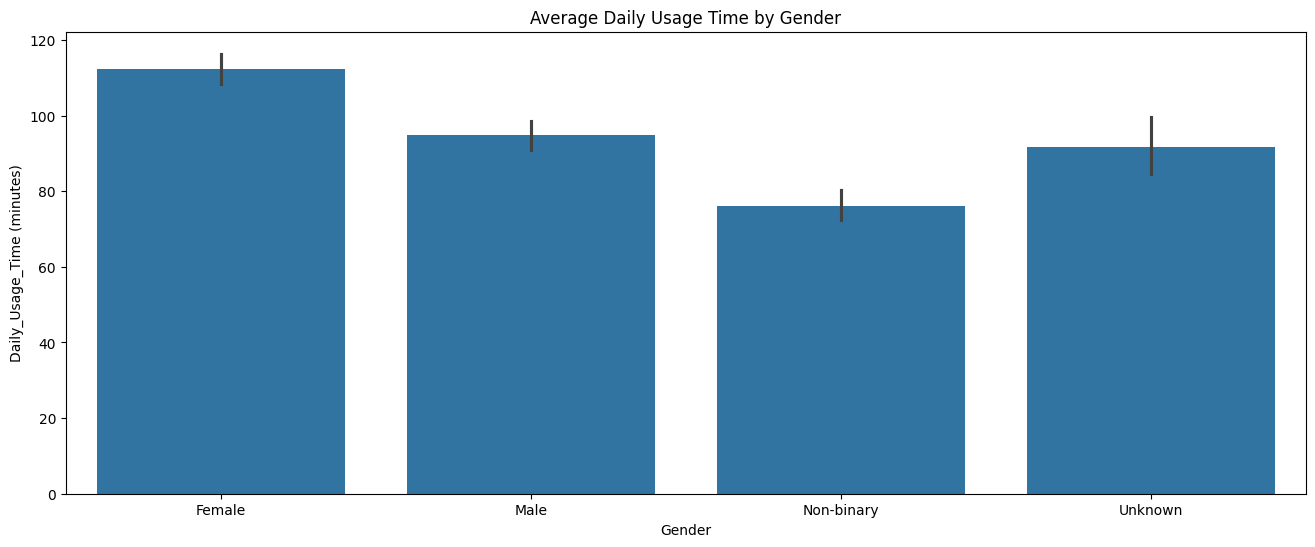

In [32]:
plt.figure(figsize=(16, 6)) 
sns.barplot(x='Gender', y='Daily_Usage_Time (minutes)', data=train_df)

plt.title('Average Daily Usage Time by Gender')
plt.show()


### Post Per Day Distribution

In [33]:
train_df['Posts_Per_Day'].unique()

array([ 3.,  5.,  2.,  8.,  1.,  4.,  6.,  7., nan])

In [34]:
# fill with mode
train_df['Posts_Per_Day'].fillna(train_df['Posts_Per_Day'].mode()[0], inplace=True)

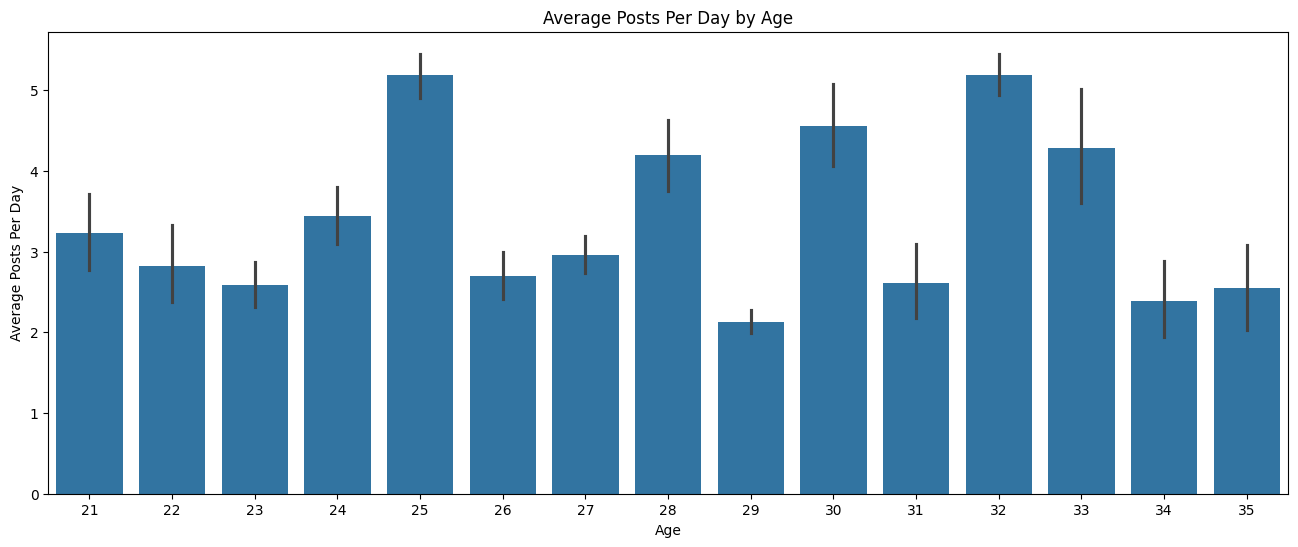

In [35]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Age', y='Posts_Per_Day', data=train_df)

plt.title('Average Posts Per Day by Age')
plt.xlabel('Age')
plt.ylabel('Average Posts Per Day')
plt.show()


### Likes Per Day Distribution

In [36]:
train_df['Likes_Received_Per_Day'].unique()

array([ 45.,  20.,  15., 100.,   5.,  60.,  30.,  25.,  10.,  80.,  35.,
        12.,  90.,  40.,  55.,  33.,   8.,  70.,  28.,  11.,  95.,  18.,
         9.,  85.,  38.,   6.,  13.,  75.,  27.,  88.,  22.,  78.,  29.,
        50.,  36.,  72.,  65., 110.,  14.,  17., 105.,  43.,  37.,  42.,
        48.,  21.,  24.,  23.,  83.,  nan])

In [37]:
# filling wih mode
train_df['Likes_Received_Per_Day'].fillna(train_df['Likes_Received_Per_Day'].mode()[0], inplace=True)

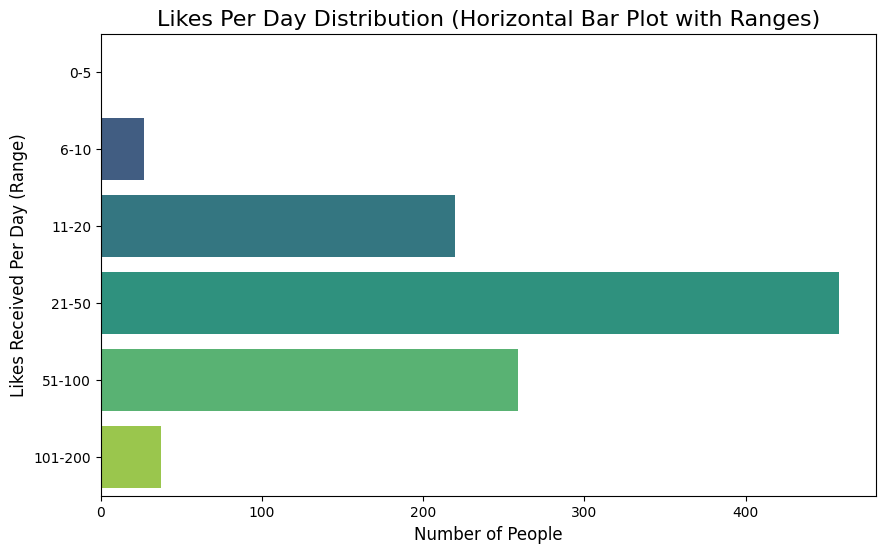

In [38]:
bins = [0, 5, 10, 20, 50, 100, 200]
labels = ['0-5', '6-10', '11-20', '21-50', '51-100', '101-200']  # Completed the labels list

train_df['Likes_Range'] = pd.cut(train_df['Likes_Received_Per_Day'], bins=bins, labels=labels, right=False)
likes_range_counts = train_df['Likes_Range'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=likes_range_counts.values, y=likes_range_counts.index, palette='viridis')

plt.title('Likes Per Day Distribution (Horizontal Bar Plot with Ranges)', fontsize=16)
plt.xlabel('Number of People', fontsize=12)
plt.ylabel('Likes Received Per Day (Range)', fontsize=12)
plt.show()


Common Range: 21-50 likes daily, about 450 people.

Moderate Range: 11-20 likes daily, roughly 250 people.

Least Common: 6-10 and 101-200 likes daily, around 50 people each.

### Comments Per Day Distribution

In [39]:
train_df['Comments_Received_Per_Day'].unique()

array([10., 25.,  5., 30.,  2., 15., 12.,  3., 20.,  7.,  4., 23., 18.,
       22., 14., 26.,  8., 19., 17., 11.,  6.,  9., 13., 40., 16., 35.,
       38., 28., 36., 33., nan])

In [40]:
# filling with mode
train_df['Comments_Received_Per_Day'].fillna(train_df['Comments_Received_Per_Day'].mode()[0], inplace=True)

In [41]:
train_df['Comments_Received_Per_Day'].unique()

array([10., 25.,  5., 30.,  2., 15., 12.,  3., 20.,  7.,  4., 23., 18.,
       22., 14., 26.,  8., 19., 17., 11.,  6.,  9., 13., 40., 16., 35.,
       38., 28., 36., 33.])

In [42]:
comments_received_counts = train_df['Comments_Received_Per_Day'].value_counts().sort_index()
plt = px.bar(
    x=comments_received_counts.index, 
    y=comments_received_counts.values, 
    title='Comments Per Day Distribution',
    labels={'x': 'Comments Received Per Day', 'y': 'Count'}
)
plt.show()

Frequent Range: 20 comments daily, seen on approximately 75 days.

Consistent Engagement: 15-20 comments daily, indicating regular interaction.

Activity Spread: Varies from few to about 40 comments, showing engagement fluctuations

### Messages Per Day Distribution

In [43]:
comments_received_counts = train_df['Messages_Sent_Per_Day'].value_counts().sort_index()
plt = px.bar(
    x=comments_received_counts.index, 
    y=comments_received_counts.values, 
    title='Messages Per Day Distribution',
    labels={'x': 'Messages Received Per Day', 'y': 'Count'}
)
plt.show()

### Emotion Distribution

In [44]:
train_df['Dominant_Emotion'].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness',
       nan], dtype=object)

In [45]:
# fill with mode
train_df['Dominant_Emotion'].fillna(train_df['Dominant_Emotion'].mode()[0], inplace=True)

In [46]:
plt = px.pie(train_df, names='Dominant_Emotion', title='Dominant Emotion Distribution')
# adding the values to the pie section
plt.update_traces(textposition='inside', textinfo='percent+label')
plt.show()

Most Common Emotions: The pie chart highlights the most prevalent emotions or states, with happiness (20.1%) and neutrality (20%) being the most frequent among the depicted categories.

Negative Emotions: Anxiety (17%) and sadness (16%) form a significant portion, suggesting these emotions are relatively common.

Less Frequent States: Boredom (14%) and anger (13%) are the least represented, indicating that these states, while present, are less frequent than the others.

## Relationship Between Variables

### Gender and Platform

In [47]:
# Group the data by gender and platform
grouped = train_df.groupby(['Gender', 'Platform'])

# Count the number of rows in each group
counts = grouped.size()

In [48]:
plt = px.histogram(train_df, x='Gender', color='Platform', title='Platform by Gender Usage')
plt.show()

### Gender and Platform VS Daily Usage Time (minutes)

In [49]:
plt = px.histogram(train_df, x='Posts_Per_Day', y='Platform' ,color='Gender', title='Posts Per Day by Gender')
plt.show()

### Gender VS Emotions

In [50]:
# checking the Gender againest the Dominant_Emotion
grouped = train_df.groupby(['Gender', 'Dominant_Emotion'])

# count the number of rows in each group
counts = grouped.size()

In [51]:
# ploting
plt = px.histogram(train_df, x='Gender', color='Dominant_Emotion', title='Dominant Emotion by Gender')
plt.show()

### Platform VS Emotions

In [52]:
# checking the Platformagainest the Dominant_Emotion
grouped = train_df.groupby(['Platform', 'Dominant_Emotion'])

# count the number of rows in each group
counts = grouped.size()

In [53]:
Plt = px.histogram(train_df, x='Platform', color='Dominant_Emotion', title='Dominant Emotion by Platform')
Plt.show()

- Happiness is the dominant emotion on Instagram. Anger has the least count.
- Anger is the dominant emotion on Twitter and Whatsapp. Happiness has the least count on both.
- Sadness is also dominant on Twitter and Snapchat.
- Neutral is the dominant emotion on Facebook and Telegram.
- Boredom is the dominant emotion on LinkedIn and Facebook.
- Anxiety is also dominant on Facebook and other platforms.

In [54]:
# Create a contingency table
contingency_table = pd.crosstab(train_df['Platform'], train_df['Dominant_Emotion'])

# Plot the heatmap
fig = px.imshow(contingency_table, title='Platform vs Dominant Emotion Heatmap')
fig.show()

Happy Instagram: Instagram is strongly associated with happiness, as indicated by the bright yellow square, showing a high count of happy interactions.

Mixed Emotions: Other platforms show varying levels of emotions, with different shades indicating lower counts of each emotion.

Emotional Diversity: The heatmap reveals that each platform elicits a range of emotions, reflecting diverse user experiences.

### Time Spent VS Emotions

In [55]:
import plotly.express as px

# Aggregate data by Dominant_Emotion and calculate the average Daily Usage Time
aggregated_data = train_df.groupby('Dominant_Emotion')['Daily_Usage_Time (minutes)'].mean().reset_index()

# Create a bar plot to show the average daily usage time by dominant emotion
plt = px.bar(aggregated_data, 
             x='Dominant_Emotion', 
             y='Daily_Usage_Time (minutes)', 
             title='Average Daily Usage Time by Dominant Emotion',
             color='Dominant_Emotion',  # Color by dominant emotion for clarity
             color_discrete_sequence=px.colors.qualitative.Set2)  # Choose a pleasing color palette

plt.show()


Emotion & Usage: Happiness has the highest average daily usage time (~150 minutes), indicating users engage more when they are happy.

Consistent Usage: Anger and Anxiety are next, both around 100 minutes, suggesting significant engagement even when experiencing negative emotions.

Lesser Usage: Boredom has the lowest daily usage (~75 minutes), showing reduced engagement during this state.

### Likes Received VS Emotions
* This is the last realation I'll be looking in this data.

In [56]:
import plotly.express as px

# Aggregate data by Dominant_Emotion and calculate the average Likes Received Per Day
aggregated_data = train_df.groupby('Dominant_Emotion')['Likes_Received_Per_Day'].mean().reset_index()

# Create a bar plot to show the average likes received per day by dominant emotion
plt = px.bar(aggregated_data, 
             x='Dominant_Emotion', 
             y='Likes_Received_Per_Day', 
             title='Average Likes Received Per Day by Dominant Emotion',
             color='Dominant_Emotion',  # Color by dominant emotion for clarity
             color_discrete_sequence=px.colors.qualitative.Set2)  # Choose a pleasing color palette

plt.show()


# Model Training

In [57]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [58]:
# Checking for missing values
train_df.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         1
Dominant_Emotion              0
Likes_Range                   0
dtype: int64

In [59]:
# Let's drop the missing values
train_df.dropna(inplace=True)

In [60]:
# Define features and target, while excluding specific columns
X_train = train_df.drop(columns=['Dominant_Emotion', 'User_ID']) # Features
y_train = train_df['Dominant_Emotion'] # Target

In [61]:
# Define preprocessing steps. Seeperating the numerical and categorical features
numeric_features = ['Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']
categorical_features = ['Age', 'Gender', 'Platform']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [62]:
train_df.dropna(inplace=True)# Define features and target
X_test = test_df.drop(columns=['Dominant_Emotion', 'User_ID']) # Features
y_test = test_df['Dominant_Emotion'] # Target
X_test.dropna(inplace=True)
y_test.dropna(inplace=True)

### Random Forest Classifier

In [63]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))])

# Train the model
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Report:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00         9
     Anxiety       1.00      0.95      0.98        21
     Boredom       0.93      0.93      0.93        15
   Happiness       0.93      1.00      0.97        14
     Neutral       1.00      0.96      0.98        26
     Sadness       0.93      1.00      0.97        14

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99



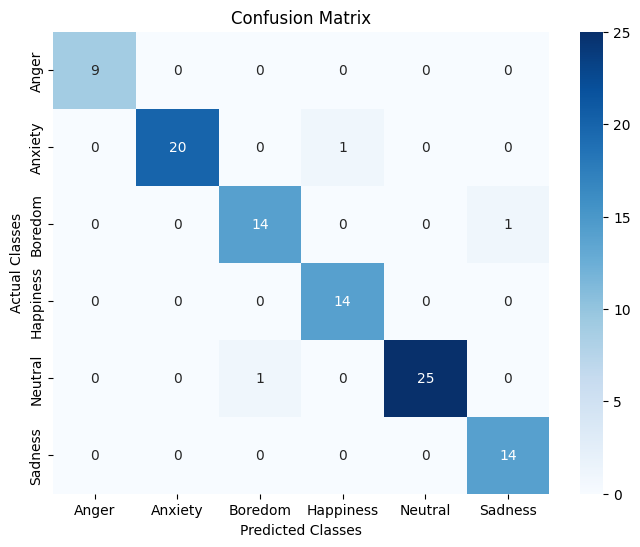

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Class labels
class_names = ['Anger', 'Anxiety', 'Boredom', 'Happiness', 'Neutral', 'Sadness']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.title('Confusion Matrix')
plt.show()


In [65]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors Classifier
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

print("K-Nearest Neighbors Classifier Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classifier Report:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00         9
     Anxiety       1.00      0.95      0.98        21
     Boredom       0.93      0.93      0.93        15
   Happiness       0.88      1.00      0.93        14
     Neutral       1.00      0.92      0.96        26
     Sadness       0.93      1.00      0.97        14

    accuracy                           0.96        99
   macro avg       0.96      0.97      0.96        99
weighted avg       0.96      0.96      0.96        99



In [66]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(random_state=42))])

dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)

print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00         9
     Anxiety       1.00      0.90      0.95        21
     Boredom       1.00      0.87      0.93        15
   Happiness       0.88      1.00      0.93        14
     Neutral       0.93      1.00      0.96        26
     Sadness       0.93      0.93      0.93        14

    accuracy                           0.95        99
   macro avg       0.96      0.95      0.95        99
weighted avg       0.95      0.95      0.95        99



In [67]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression Classifier
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print("Logistic Regression Classifier Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classifier Report:
              precision    recall  f1-score   support

       Anger       0.64      0.78      0.70         9
     Anxiety       0.88      0.71      0.79        21
     Boredom       0.78      0.93      0.85        15
   Happiness       0.79      0.79      0.79        14
     Neutral       0.88      0.88      0.88        26
     Sadness       0.85      0.79      0.81        14

    accuracy                           0.82        99
   macro avg       0.80      0.81      0.80        99
weighted avg       0.83      0.82      0.82        99



In [68]:
from sklearn.svm import SVC

# Support Vector Machine Classifier
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(random_state=42))])

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

print("Support Vector Machine Classifier Report:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Classifier Report:
              precision    recall  f1-score   support

       Anger       0.82      1.00      0.90         9
     Anxiety       1.00      0.95      0.98        21
     Boredom       0.93      0.93      0.93        15
   Happiness       0.93      1.00      0.97        14
     Neutral       1.00      0.92      0.96        26
     Sadness       0.93      0.93      0.93        14

    accuracy                           0.95        99
   macro avg       0.94      0.96      0.94        99
weighted avg       0.95      0.95      0.95        99



In [69]:
from sklearn.ensemble import StackingClassifier

# Define base models
base_estimators = [
    ('random_forest', rf_pipeline),
    ('knn', knn_pipeline),
    ('svm', svm_pipeline)
]

# Meta-model: Logistic Regression
stacking_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression()
)

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Predictions
y_pred_stacking = stacking_model.predict(X_test)

# Evaluation
print("Ensemble Model (Stacking Classifier) Report:")
print(classification_report(y_test, y_pred_stacking))


Ensemble Model (Stacking Classifier) Report:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00         9
     Anxiety       1.00      0.95      0.98        21
     Boredom       0.93      0.93      0.93        15
   Happiness       0.88      1.00      0.93        14
     Neutral       1.00      0.92      0.96        26
     Sadness       0.93      1.00      0.97        14

    accuracy                           0.96        99
   macro avg       0.96      0.97      0.96        99
weighted avg       0.96      0.96      0.96        99



In [70]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to calculate metrics
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return pd.Series([model_name, accuracy, precision, recall, f1], index=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Calculate metrics for each model and concatenate results
metrics_list = [
    calculate_metrics(y_test, y_pred_rf, 'Random Forest'),
    calculate_metrics(y_test, y_pred_knn, 'K-Nearest Neighbors'),
    calculate_metrics(y_test, y_pred_dt, 'Decision Tree'),
    calculate_metrics(y_test, y_pred_lr, 'Logistic Regression'),
    calculate_metrics(y_test, y_pred_svm, 'Support Vector Machine'),
    calculate_metrics(y_test, y_pred_stacking, 'Stacking Classifier')
]
results = pd.concat([results, pd.DataFrame(metrics_list)], ignore_index=True)

In [71]:
# Rank the models based on F1 Score
ranked_results = results.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

# Display the ranked results
display(ranked_results)

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.969697,0.971044,0.969697,0.969823
1,K-Nearest Neighbors,0.959596,0.962795,0.959596,0.959916
2,Stacking Classifier,0.959596,0.962795,0.959596,0.959916
3,Support Vector Machine,0.949495,0.953841,0.949495,0.950152
4,Decision Tree,0.949495,0.953463,0.949495,0.949316
5,Logistic Regression,0.818182,0.825955,0.818182,0.818319


## About Models:

`Random Forest Classifier`: __accuracy: 97%__
The Random Forest Classifier is performing exceptionally well on this dataset, with nearly perfect precision, recall, and f1-scores for most classes and an overall accuracy of 97%. This indicates that the model is highly effective at predicting the dominant emotion based on the given features.

`K-Nearest Neighbors Classifier`: __accuracy: 96%__
The K-Nearest Neighbors Classifier is performing very well on this dataset, with high precision, recall, and f1-scores for most classes and an overall accuracy of 96%. This indicates that the model is highly effective at predicting the dominant emotion based on the given features.

`Decision Tree Classifier`: __accuracy: 95%__
The Decision Tree Classifier is performing well on this dataset, with high precision, recall, and f1-scores for most classes and an overall accuracy of 95%. This indicates that the model is effective at predicting the dominant emotion based on the given features.

`Support Vector Machine Classifier`: __accuracy: 95%__
The Support Vector Machine Classifier is performing well on this dataset, with high precision, recall, and f1-scores for most classes and an overall accuracy of 95%. This indicates that the model is effective at predicting the dominant emotion based on the given features.

`Logistic Regression Classifier`: __accuracy: 82%__
The Logistic Regression Classifier is performing moderately well on this dataset, with decent precision, recall, and f1-scores for most classes and an overall accuracy of 82%. This indicates that the model is reasonably effective at predicting the dominant emotion based on the given features.

`Stacking Classifier`: __accuracy: 96%__
The Stacking Classifier, which combines multiple models, is performing very well on this dataset, with high precision, recall, and f1-scores for most classes and an overall accuracy of 96%. This indicates that the ensemble model is highly effective at predicting the dominant emotion based on the given features.

In [72]:
import joblib

# Save each model to a file
joblib.dump(rf_pipeline, 'rf_pipeline.pkl')
joblib.dump(knn_pipeline, 'knn_pipeline.pkl')
joblib.dump(dt_pipeline, 'dt_pipeline.pkl')
joblib.dump(lr_pipeline, 'lr_pipeline.pkl')
joblib.dump(svm_pipeline, 'svm_pipeline.pkl')
joblib.dump(stacking_model, 'stacking_model.pkl')

['stacking_model.pkl']